# Data Analysis with Python

In [39]:
#import relevant libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
#download stock price data and store in dataframe
amzn = pdr.get_data_yahoo('AMZN', start = '2019-08-01')

In [41]:
#Take a look
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-31,1899.550049,1849.439941,1898.109985,1866.780029,4470700,1866.780029
2019-08-01,1897.920044,1844.010010,1871.719971,1855.319946,4713300,1855.319946
2019-08-02,1846.359985,1808.020020,1845.069946,1823.239990,4956200,1823.239990
2019-08-05,1788.670044,1748.780029,1770.219971,1765.130005,6058200,1765.130005
2019-08-06,1793.770020,1753.400024,1792.229980,1787.829956,5070300,1787.829956


In [42]:
#Get the data we are interested in
amzn_close = amzn['Close']

In [43]:

amzn_close.head()

Date
2019-07-31    1866.780029
2019-08-01    1855.319946
2019-08-02    1823.239990
2019-08-05    1765.130005
2019-08-06    1787.829956
Name: Close, dtype: float64

In [44]:
#Verify data structure
type(amzn_close)

pandas.core.series.Series

In [45]:
#intatenous rate of return
amzn_percent_change = np.log(amzn_close/amzn_close.shift(1))*100
amzn_percent_change

Date
2019-07-31         NaN
2019-08-01   -0.615788
2019-08-02   -1.744203
2019-08-05   -3.239079
2019-08-06    1.277822
                ...   
2020-08-10   -0.611187
2020-08-11   -2.167105
2020-08-12    2.613355
2020-08-13   -0.038587
2020-08-14   -0.412108
Name: Close, Length: 264, dtype: float64

In [46]:
#pandas describe function gives descriptive statisics.
#pandas also deals with missing values by omitting them
amzn_percent_change.describe()

count    263.000000
mean       0.198692
std        2.101068
min       -8.253502
25%       -0.805957
50%        0.241980
75%        1.110987
max        7.630827
Name: Close, dtype: float64

In [47]:
#Alternative, yet comprehensive table of descriptive stats can be genderated
#by using scipy library
from scipy import stats
stats.describe(amzn_percent_change[1:])

DescribeResult(nobs=263, minmax=(-8.253501999172958, 7.630827178768753), mean=0.19869150295435464, variance=4.414485427407771, skewness=0.06869607457727704, kurtosis=2.756806699185198)

In [48]:
#for comparision generate random number that follows normal distribution
x = np.random.normal(0.1986, 2.1010, 263)# (mean, std, ob)
stats.describe(x)

DescribeResult(nobs=263, minmax=(-6.365099231751516, 6.553566575068828), mean=0.15408914491530026, variance=4.022418969230876, skewness=0.01029071055985559, kurtosis=0.383640716173137)

In [49]:
#use scipy stats to test the kurtosis.  H0:Sample drawn from population 
# where the underlyng kurtosis is that of a normally distr. variable
print('x:', stats.kurtosistest(x))
print('amzn:', stats.kurtosistest(amzn_percent_change[1:]))

x: KurtosistestResult(statistic=1.3351131370771085, pvalue=0.18183932043518292)
amzn: KurtosistestResult(statistic=4.670668384071384, pvalue=3.0022126884078596e-06)


In [50]:
#two tailed t-test (x) shows 57% chance that we reject H0 when it is actually true
#two tailed t-test (amzn) shows 0.0000003 % chance that we reject H0 when it is actually true
#x follows normal distribution
#amzn not follows normal distribution 

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

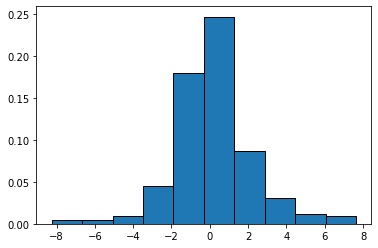

In [54]:
#plot histogram of price changes with normal curve overlay
import matplotlib.mlab as mlab
plt.hist(amzn_percent_change, edgecolor='black', normed=True)

#overlay  normal curve
mean = float(np.mean(amzn_percent_change))
sd = float(np.std(amzn_percent_change))
min_chng=float(np.min(amzn_percent_change))
max_chng=float(np.max(amzn_percent_change))
a = np.linspace(min_chng, max_chng, 100)

plt.plot(a, mlab.normpdf(a, mean, sd))




AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

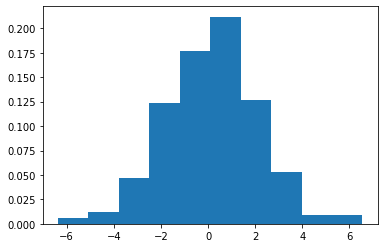

In [55]:
#compare to sample drawn from N.D. population with same attributes

plt.hist(x, normed=True)
mean = float(np.mean(x))
sd =float(np.std(x))
b = np.linspace(np.min(x), np.max(x), 100)
plt.plot(b, mlab.normpdf(b, mean, sd))
plt.show()